In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
# Пример №1
x, y = sp.symbols("x y")
z = x**3 + y**2
dx, dy, dz, d = sp.symbols("dx dy dz d")
sp.pprint(dz/dx)
sp.pprint(sp.diff(z, x))
print('----------------')
sp.pprint(dz/dy)
sp.pprint(sp.diff(z, y))
print('----------------')
sp.pprint(d*dz/dx**2)
sp.pprint(sp.diff(z, x, 2))
print('----------------')
sp.pprint(d*dz/dy**2)
sp.pprint(sp.diff(z, y, 2))

dz
──
dx
   2
3⋅x 
----------------
dz
──
dy
2⋅y
----------------
d⋅dz
────
  2 
dx  
6⋅x
----------------
d⋅dz
────
  2 
dy  
2


In [4]:
# УПРАЖНЕНИЕ 1
# а)
x, y = sp.symbols("x y")
z = sp.cos(3*x + y**2)
print("dz/dx")
print(sp.diff(z, x))
print("\ndz/dy")
print(sp.diff(z, y))
print("\nddz/dx**2")
print(sp.diff(z, x, 2))
print("\nddz/dy**2")
print(sp.diff(z, y, 2))

dz/dx
-3*sin(3*x + y**2)

dz/dy
-2*y*sin(3*x + y**2)

ddz/dx**2
-9*cos(3*x + y**2)

ddz/dy**2
-2*(2*y**2*cos(3*x + y**2) + sin(3*x + y**2))


In [5]:
# УПРАЖНЕНИЕ 1
# б)
x, y, z = sp.symbols("x y z")
i, j, k = sp.symbols("i j k")
f = 2*x**3*y + x - z
sp.pprint(f)
print("grad(f) : ")
sp.pprint(sp.diff(f, x) + sp.diff(f, y) + sp.diff(f, z))
print((sp.diff(f, x) * i + sp.diff(f, y) * j + sp.diff(f, z) * k).subs([(x, 1), (y, 2), (z, -3)]))

   3          
2⋅x ⋅y + x - z
grad(f) : 
   3      2  
2⋅x  + 6⋅x ⋅y
13*i + 2*j - k


In [6]:
# Пример 2
r, t = sp.symbols("r t")
x = r * sp.cos(t)
y = r * sp.sin(t)

A = sp.Matrix([[x,y]])
sp.pprint(A)
# B = sp.Matrix([[x, 1], [0, y]])
# sp.pprint(B)
B = sp.Matrix([ [sp.diff(A, r)],  [sp.diff(A, t)] ])
sp.pprint(B)
sp.pprint(B.det().simplify())

[r⋅cos(t)  r⋅sin(t)]
⎡ cos(t)     sin(t) ⎤
⎢                   ⎥
⎣-r⋅sin(t)  r⋅cos(t)⎦
r


In [7]:
# УПРАЖНЕНИЕ 2
r, p = sp.symbols("r p")
x = r * sp.cos(p)
y = r * sp.sin(p)
z = sp.symbols("z")

A = sp.Matrix([[x, y, z]])
J = sp.Matrix([ [sp.diff(A, r)],  [sp.diff(A, p)],  [sp.diff(A, z)] ])
sp.pprint(B.det().simplify())
# ВЕРНО

r


In [8]:
# УПРАЖНЕНИЕ 3
# a)
x, y = sp.symbols("x y")
z = x * y**2 + 2*y - x**2
dz_dx = sp.diff(z, x)
dz_dy = sp.diff(z, y)
dx, dy = 0.1, -0.2
Point = [2, -1]
dz  = dz_dx.subs([(x , Point[0]), (y, Point[1])]) * dx 
dz += dz_dy.subs([(x , Point[0]), (y, Point[1])]) * dy 
print(dz)

# б)
def delta_f(f, x0, y0, dx, dy):
    df_dx = sp.diff(z, x)
    df_dy = sp.diff(z, y)
    
    df  = df_dx.subs([(x , x0), (y, y0)]) * dx 
    df += df_dy.subs([(x , x0), (y, y0)]) * dy

    return df 
print(delta_f(z, *Point, 0.1, -0.2)) 

0.100000000000000
0.100000000000000


In [9]:
# УПРАЖНЕНИЕ 4
# a)
x, y = sp.symbols("x y")
z = x * y**2 + 2*y - x**2
dx, dy = 0.1, -0.2
Point = [2, -1]

dz_dx = sp.diff(z, x)
dz_dy = sp.diff(z, y)

d2z_dx2 = sp.diff(dz_dx, x)
d2z_dy2 = sp.diff(dz_dx, y)
d2z_dxdy = sp.diff(dz_dx, x)
d2z_dydx = sp.diff(dz_dx, y)

d2z  = d2z_dx2.subs([(x , Point[0]), (y, Point[1])]) * dx**2 
d2z += d2z_dy2.subs([(x , Point[0]), (y, Point[1])]) * dy**2 
d2z += d2z_dxdy.subs([(x , Point[0]), (y, Point[1])]) * dx * dy 
d2z += d2z_dydx.subs([(x , Point[0]), (y, Point[1])]) * dx * dy
print(d2z)

# б)
def delta_f(f, x0, y0, dx, dy):
    df_dx = sp.diff(z, x)
    df_dy = sp.diff(z, y)

    d2f_dx2 = sp.diff(dz_dx, x)
    d2f_dy2 = sp.diff(dz_dx, y)
    d2f_dxdy = sp.diff(dz_dx, x)
    d2f_dydx = sp.diff(dz_dx, y)

    d2f  = d2f_dx2.subs([(x , Point[0]), (y, Point[1])]) * dx**2 
    d2f += d2f_dy2.subs([(x , Point[0]), (y, Point[1])]) * dy**2 
    d2f += d2f_dxdy.subs([(x , Point[0]), (y, Point[1])]) * dx * dy 
    d2f += d2f_dydx.subs([(x , Point[0]), (y, Point[1])]) * dx * dy

    return d2f 
print(delta_f(z, *Point, 0.1, -0.2)) 

-0.0200000000000000
-0.0200000000000000


In [21]:
# УПРАЖНЕНИЕ 5
# a)
x, y = sp.symbols("x y")
z = x * y**2 + 2*y - x**2
dx, dy = 0.1, -0.2
Point = [2, -1]

def find_Tailor(f, x0, y0, dx, dy):
    df_dx = sp.diff(z, x)
    df_dy = sp.diff(z, y)
    # df  = df_dx.subs([ (x, x0), (y, y0)]) * dx
    # df += df_dy.subs([ (x, x0), (y, y0)]) * dy

    f_approximate = f.subs([ (x, x0), (y, y0) ])
    f_approximate += df_dx * (x - x0) + df_dy * (y - y0)

    f_approximate_value  = f.subs([ (x, x0), (y, y0) ])
    f_approximate_value += delta_f(f, x0, y0, dx, dy) # df 
    
    # f_approximate_value  = f_approximate.subs([ (x, x0), (y, y0) ])
    
    return (f_approximate, f_approximate_value)

print(find_Tailor(z, *Point, dx, dy))
print(z.subs([ (x, Point[0]), (y, Point[1]) ]))

((-2*x + y**2)*(x - 2) + (y + 1)*(2*x*y + 2) - 4, -4.02000000000000)
-4


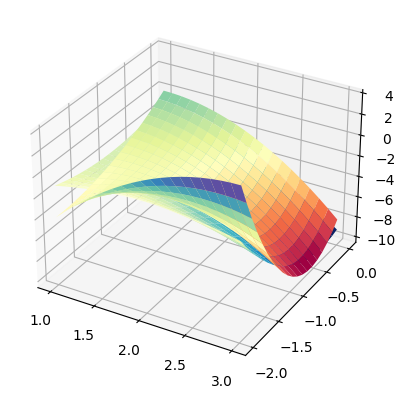

In [22]:
# б)
x = np.linspace(Point[0] - 1, Point[0] + 1, 20)
y = np.linspace(Point[1] - 1, Point[1] + 1, 20)
X, Y = np.meshgrid(x, y)
Z = X * Y**2 + 2*Y - X**2
Z_ = (-2*X + Y**2)*(X - 2) + (Y + 1)*(2*X*Y + 2) - 4

fig, ax = plt.subplots(subplot_kw={"projection" : "3d"})
surface_orig = ax.plot_surface(X, Y, Z, cmap = cm.YlGnBu_r, linewidth = 0)
surface_tailor = ax.plot_surface(X, Y, Z_, cmap = "Spectral", linewidth = 0)
plt.show()

In [ ]:
# УПРАЖНЕНИЕ 6